## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

**Delete this section from the report, when using this template.** 

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix and references will not be included in the page count, and there is no limit on the length of the appendix.

## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

## Problem statement 

Describe your four questions. Articulate your questions using absolutely no jargon. 

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

I used data from this site: https://ourworldindata.org/co2-emissions, in order to get the carbon emission data for cross-comparison. All it does is show carbon emission for all the countries, as well as a compiled carbon emission version for the entire World (which I will be focusing on). The following site: https://ourworldindata.org/natural-disasters was used to find the impact of natural disasters for cross-comparison with carbon emissions. It shows various types of impacts of natural disasters over the years for each country and the World. https://ourworldindata.org/grapher/number-of-natural-disaster-events was used to find the number of natural disasters and how the increase over time. This time it only showed the number of disasters over the whole world. Lastly, I used https://ourworldindata.org/world-population-growth in order to do the final impacts comparison. This site showed population growth throughout the world. I made sure to use data from the same site in order to have similar compiling methods, making it easier to eventually clean and wrangle the data.

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

## Data quality check / cleaning / preparation 

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did your analysis require any other kind of data preparation before it was ready to use?

In [240]:
co2_emissions = pd.read_csv('annual-co2-emissions-per-country.csv')
# Code doesn't matter, as such there are no missing (important) values in the co2 emissions dataset
print(co2_emissions.isna().sum())

# There are 246 unique countries, with one of the "countries" including the world.
print('\n', len(co2_emissions['Entity'].unique()))

# There are 246 "Entities" that have 272 entries in the co2_emissions dataset, with only 1 "entity" 
# having only 1.
print('\n', co2_emissions['Entity'].value_counts().value_counts())

# All I needed to do with this dataset was only take the Entities that were the World, because
# that was what I was focusing on, and then change the shape to one that would easier to handle.
world_co2_emissions = co2_emissions[co2_emissions['Entity'] == 'World']
year = world_co2_emissions['Year'].values.tolist()
emissions = world_co2_emissions['Annual CO2 emissions'].values.tolist()
world_co2_emissions = pd.DataFrame({'Year':year, 'Emissions':emissions})

Entity                     0
Code                    6328
Year                       0
Annual CO2 emissions       0
dtype: int64

 247

 272    246
72       1
Name: Entity, dtype: int64


In [215]:
num_of_disasters = pd.read_csv('number-of-natural-disaster-events.csv')
# Code column doesn't matter, as such there are no missing values in the number of disasters dataset
print(num_of_disasters.isna().sum())
# There are 11 different unique disasters (including one where it is all of them) in the dataset.
print('\n', num_of_disasters['Entity'].unique())

print('\n', num_of_disasters['Entity'].value_counts())

# This dataset only required me to take out certain columns in order to fully analyze it, however,
# that was completely unnecessary as the original dataset could have been used to the same effect.

Entity                                  0
Code                                  837
Year                                    0
Number of disasters (EMDAT (2020))      0
dtype: int64

 ['All natural disasters' 'Drought' 'Earthquake' 'Extreme temperature'
 'Extreme weather' 'Flood' 'Impact' 'Landslide' 'Mass movement (dry)'
 'Volcanic activity' 'Wildfire']

 All natural disasters    120
Earthquake               116
Extreme weather          116
Flood                     96
Landslide                 81
Volcanic activity         79
Drought                   74
Wildfire                  63
Extreme temperature       58
Mass movement (dry)       33
Impact                     1
Name: Entity, dtype: int64


In [284]:
impact_of_disasters = pd.read_csv('natural-disasters-impacts.csv')

# This shows that there are only 10 columns that did not have a single NA observation. With 14
# having 5569 missing observations and 13 with 5567 missing observations. The highest number of missing observations
# were 5569, 5567, and 5508.
print(impact_of_disasters.isna().sum().value_counts())
print('\n', pd.DataFrame(impact_of_disasters.isna().sum().value_counts()).reset_index().sort_values(by = 'index', ascending = False).head(3))

5569    14
5567    13
0       10
5492     8
4997     8
5162     8
4914     8
3237     8
4757     8
4421     8
2513     8
5276     8
2537     5
78       5
4448     5
5166     5
5003     5
4764     5
4923     5
3267     5
5279     5
5495     5
1084     1
4847     1
4800     1
5024     1
2814     1
4990     1
5508     1
3715     1
5341     1
5192     1
dtype: int64

     index   0
0    5569  14
1    5567  13
28   5508   1


In [ ]:
# This is all the data cleaning and prep that I had to do to be able to graph it.
# First we need to isolate only World data in the dataset
impact_disasters = impact_of_disasters[impact_of_disasters['Entity'] == 'World']

# Then we should find the variables that will best demonstrate the impact disasters have. For those
# variables we will choose "Number of people affected by __" and "Total economic damages from __". 
# Other variables were not chosen due to higher risk of being affected by hidden variables such as
# an increase in our ability to deal with natural disasters, technological advancement, or simply due 
# to an increase in disasters-specific awareness.
impact_disasters1 = impact_disasters.loc[:, ['Year']+[x for x in impact_of_disasters if ('Number of people affected' in x) | ('economic' in x)]]

# Then we should take out variables in the dataset that have either been shown in the previous data analysis
# or through general knowledge to not be significantly affected by carbon emissions
impact_disasters2 = impact_disasters1.loc[:, [x for x in impact_disasters1 if not ('drought' in x) | ('earthquakes' in x) | ('wildfires' in x) | ('volcanic activity' in x) | ('mass movements' in x) | ('landslides' in x) | ('fog' in x) | ('glacial lake outbursts' in x) | ('100,000' in x) | ('extreme temperatures' in x)]]

# This step is to only get economic damages that will be proportionate with the GNP at the time, meaning that it will not be affected by inflation
impact_disasters2 = impact_disasters2.drop(columns = ['Total economic damages from disasters', 'Total economic damages from floods', 'Total economic damages from storms'])

# Then we melt the dataset in order to arrange the data into a form more agreeable for plotting.
melted = pd.melt(impact_disasters2, id_vars = 'Year', var_name = 'something', value_name = 'impact')
melted['disaster_type'] = melted.apply(lambda x: 'disasters' if 'disasters' in x['something'] else 'floods' if 'floods' in x['something'] else 'storms' if 'storms' in x['something'] else None, axis = 1)
melted['damage_type'] = melted.apply(lambda x: x['something'].split()[2], axis = 1)

# Here we fill the NaNs simply with 0, as most of the reason why there are Nans is either because
# there were so little deaths that they weren't reported in the history books, or because
# we did not have the records available. Either way, Putting the Nans as 0 will not have much of an effect
# on the way we view the data, because the actual numbers at that point are so low that putting 0
# will have a negligible effect on the viewing of the data.
real_impact = melted.groupby(['Year', 'disaster_type', 'damage_type']).mean().reset_index().fillna(0)

# Here we merge the data to get the population data to prepare to divide the people affected by natural disasters
# by the population data in order to receive a statistic not as affected by population growth
real_impact = pd.merge(real_impact, population).drop(columns = ['Entity', 'Code'])
real_impact['People affected per population'] = real_impact['impact'] / real_impact['Population (historical estimates)']
real_impact = real_impact.drop(columns = 'Population (historical estimates)')

In [255]:
population = pd.read_csv('population.csv')

# Again, only missing values are Code so there really are no missing (important) values
print(population.isna().sum())

# 250 unique entities, each with an estimated population.
print('\n', 'There are {} unique entities in this dataset'.format(len(population['Entity'].unique())))

# There are 180 entities with 259 observations, 22 entities with 72 observations, and 14 with only 222 observations.
print('\n', population['Entity'].value_counts().value_counts())

# The only data preparation here was to only focus on the World entity
population = population.loc[population['Entity'] == 'World']

Entity                                  0
Code                                 2662
Year                                    0
Population (historical estimates)       0
dtype: int64

 There are 250 unique entities in this dataset

 259    180
72      22
222     14
124      5
249      3
250      2
110      2
112      2
117      1
63       1
98       1
99       1
100      1
104      1
106      1
114      1
120      1
118      1
257      1
232      1
233      1
237      1
240      1
244      1
248      1
252      1
255      1
53       1
Name: Entity, dtype: int64


## Exploratory Data Analysis

For each analysis:

What did you do exactly? How did you solve the problem? Why did you think it would be successful? 

What problems did you anticipate? What problems did you encounter? Did the very first thing you tried work? 

Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.

All code must be included with the analysis. However, the code should be folded. If a user wants to see the code they should be able to click and see the code. Check the code fold example below. All code will be folded by-default if the `code-fold: true` setting is not changed in this template. The maximum length requirement of the report holds when all code is folded.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Analysis 1
*By Nathan Jung*

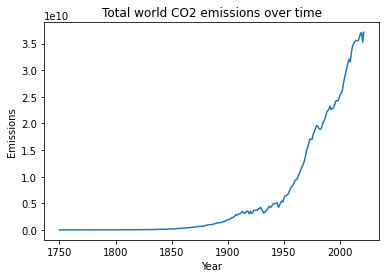

In [40]:
ax = sns.lineplot(data = world_co2_emissions, x = 'Year', y = 'Emissions').set(title = 'Total world CO2 emissions over time')

# From this graph we can see that the total CO2 emissions have risen over time, with a large increase
# being shown roughly around the industrial era. There already has been multiple analyses done on 
# the rise of CO2 emissions over time so I will not spend as much time on this.

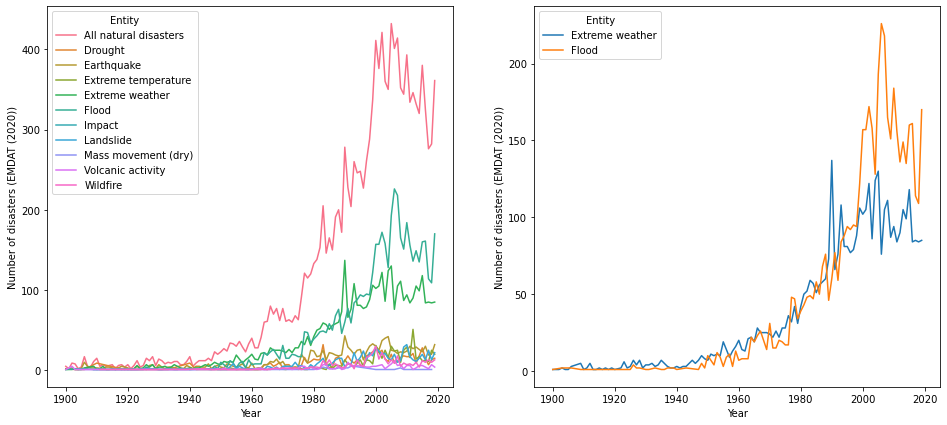

In [180]:
fix, axes = plt.subplots(1, 2, figsize = (16,7))
plt.subplots_adjust(wspace=0.2) 
# This plot shows that out of all the disasters possible, there are two that are more significant when 
# it comes to considering the rise of natural disasters over time - Floods and Extreme Weather
sns.lineplot(ax = axes[0], data = num_of_disasters, x = 'Year', y = 'Number of disasters (EMDAT (2020))', hue = 'Entity')
# So let's isolate those two variables and see how they change over time.
floods_weather = num_of_disasters[num_of_disasters.apply(lambda x: True if (x['Entity'] == 'Flood') | (x['Entity'] == 'Extreme weather') else False, axis = 1)]
sns.lineplot(data = floods_weather, x = 'Year', y = 'Number of disasters (EMDAT (2020))', hue = 'Entity')
floods_weather = num_of_disasters[num_of_disasters.apply(lambda x: True if (x['Entity'] == 'Flood') | (x['Entity'] == 'Extreme weather') else False, axis = 1)]

# Evidently we see a rise in the frequency of natural disasters, with a large spike starting at roughly the 
# 1960's. Following logic from climate change, this makes sense, as any impact to the climate from 
# rising temperatures from co2 emissions has a slow, delayed effect on the climate. Thus, the 
# trend seen in the following data makes sense.

<AxesSubplot:xlabel='Emissions', ylabel='Number of disasters (EMDAT (2020))'>

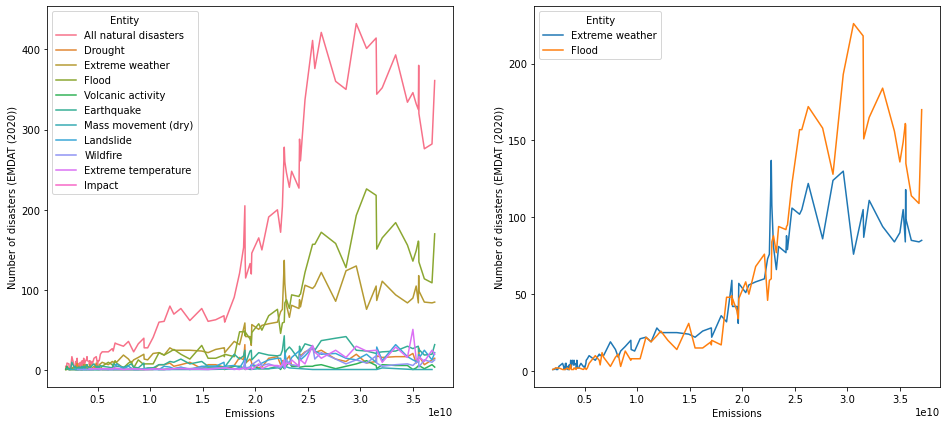

In [39]:
# Now that we know how the number of disasters change over time, let's plot how they change 
# with respect to Carbon emissions. We would expect a strong positive correlation with this data as well
# First we need to add the carbon emission data to the natural disasters data
all_disasters_data = pd.merge(num_of_disasters, world_co2_emissions)
floods_weather_data = pd.merge(floods_weather, world_co2_emissions)

fix, axes = plt.subplots(1, 2, figsize = (16,7))
plt.subplots_adjust(wspace=0.2) 
sns.lineplot(ax = axes[0], data = all_disasters_data, x = 'Emissions', y = 'Number of disasters (EMDAT (2020))', hue = 'Entity')
sns.lineplot(data = floods_weather_data, x = 'Emissions', y = 'Number of disasters (EMDAT (2020))', hue = 'Entity')

In [ ]:
# From this data we can quite obviously see a positive correlation between the frequency of 
# natural disasters and the rise of emissiosn over time. Thus, it stands to reason that there is 
# some sort of link between these two variables. Whether or not emissions are actually causing 
# the frequency rise is another matter entirely.

In [ ]:
# Now that the relationship between emissions and the frequency of natural disasters has been shown,
# what about the intensity of natural disasters? Evidently the number of natural disasters rising is a concern
# but that doesn't necessarily mean it could be bad. Perhaps the rise in numbers means that the 
# intensity of disasters has gone down, resulting in lower deaths. Or perhaps it's just all a big 
# coincidence.

In [41]:
# Thus, using the impact of disasters dataset we can measure the intensity of natural disasters
# and whether there is any link between rising intensity and rising CO2 emissions.

Text(0, 0.5, 'People Affected (Adjusted for Population Growth)')

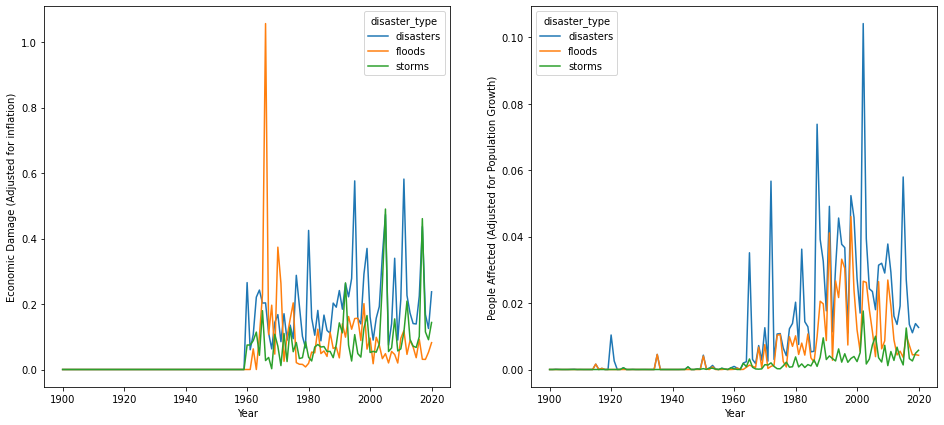

In [176]:
fix, axes = plt.subplots(1, 2, figsize = (16,7))
plt.subplots_adjust(wspace=0.2) 

a = sns.lineplot(ax = axes[0], data = real_impact.loc[real_impact['damage_type'] == 'damages'], y = 'impact', x = 'Year', hue = 'disaster_type')
a.set_ylabel('Economic Damage (Adjusted for inflation)')
b = sns.lineplot(data = real_impact.loc[real_impact['damage_type'] == 'people'], y = 'People affected per population', x = 'Year', hue = 'disaster_type')
b.set_ylabel('People Affected (Adjusted for Population Growth)')

In [ ]:
# From these graphs we can see, although slight, an increase in both Economic damage and People affected
# over the years. 

Text(0, 0.5, 'People Affected (Adjusted for population growth)')

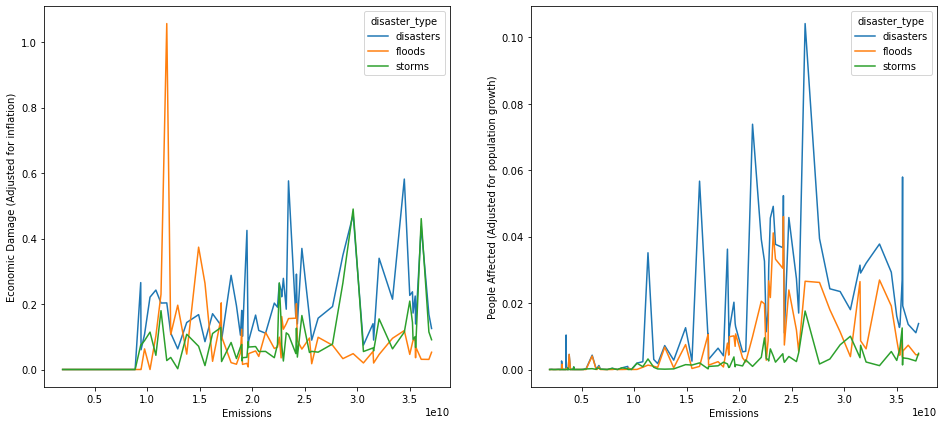

In [177]:
impact_emissions = pd.merge(real_impact, world_co2_emissions)

fix, axes = plt.subplots(1, 2, figsize = (16,7))
plt.subplots_adjust(wspace=0.2) 

a = sns.lineplot(ax = axes[0], data = impact_emissions.loc[impact_emissions['damage_type'] == 'damages'], y = 'impact', x = 'Emissions', hue = 'disaster_type')
a.set_ylabel('Economic Damage (Adjusted for inflation)')
b = sns.lineplot(data = impact_emissions.loc[impact_emissions['damage_type'] == 'people'], y = 'People affected per population', x = 'Emissions', hue = 'disaster_type')
b.set_ylabel('People Affected (Adjusted for population growth)')

In [ ]:
# Similar trends are seen in the economic damage and people affected v.s. emissions graph. Although
# the increases are only slight, there still remains an increase in economic damage as emissions increase.

# In conclusion, there is a strong correlation shown between the increase of natural disasters over time.
# The intensity of these disasters are shown to have increased, albeit slightly, with regards to 
# the increase in carbon emissions.

## Other sections

You are welcome to introduce additional sections or subsections, if required, to address your questions in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions

Do the individual analysis connect with each other to answer a bigger question? If yes, explain.

The individual analyses do connect with each other to answer a bigger question, although loosely. The natural disasters analysis shows the reason why carbon emissions rising is important, demonstrating the importance of lowering carbon emissions due to the potential damages natural disasters cause. Then, of the countries that contribute to this threat, the US and China are the greatest carbon emitters. To further investigate the causes of carbon emissions, we have found out that individual action is not the greatest contributer to this rise in emissions, rather a large portion of the emissions stem from industrial/group processes. Lastly, within the US in particular, we discovered that power plants are the greates contributers of carbon emissions, with Texas being the greatest offender within the US.

## Recommendations to stakeholder(s)
What are the action items for the stakeholder(s) based on your analysis? Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

Do the stakeholder(s) need to be aware about some limitations of your analysis? Can your analysis be directly used by the stakeholder(s) to obtain the expected benefit / make decisions, or do they need to do some further analysis based on their own, or do they need to repeat your analysis on a more recent data for the results to be applicable? 

The first action item stakeholders should implement is to begin the process of changing the source of fuel of the powerplants to something that is more eco-friendly. This would help lower carbon emissions and begin the process to helping save the planet. The second and most important action item would be for citizens to pressure American and Chinese politicans, governments, and companies to implement policies or speak out against rising carbon emissions, as lowering the carbon emissions of the greatest carbon emitter countries would be greatly beneficial.

The stakeholders do need to be aware of some limitations. Although research has been done in depth about the topics in question, not enough has been done to consider potential hidden variables or even causality between the topics we researched. As such stakeholders should use our research as a base to build their own research upon. Further research should be doneinto specific policies or actions that would make the greatest difference in lowering carbon emissions.

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.